In [ ]:
#p 316

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("auto-mpg.csv", header = 0)

In [6]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [8]:
#drop columns + 
df = df.drop(['horsepower', 'origin', 'car_name'], axis=1, inplace=False)
df[:2]

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70


In [9]:
df.shape

(398, 6)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
y = df['mpg']
X =df.drop(['mpg'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
lr = LinearRegression().fit(X_train, y_train)

In [14]:
y_predict = lr.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(y_test, y_predict)))

MSE : 11.626, RMSE : 3.410
R^2(Variance score) : 0.814


In [21]:
print('Y절편', np.round(lr.intercept_, 2))
print('회귀계수값', np.round(lr.coef_, 2))

Y절편 -17.09
회귀계수값 [-0.07  0.01 -0.01  0.2   0.75]


In [25]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

model_year      0.75
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.07
dtype: float64

In [29]:
import seaborn as sns

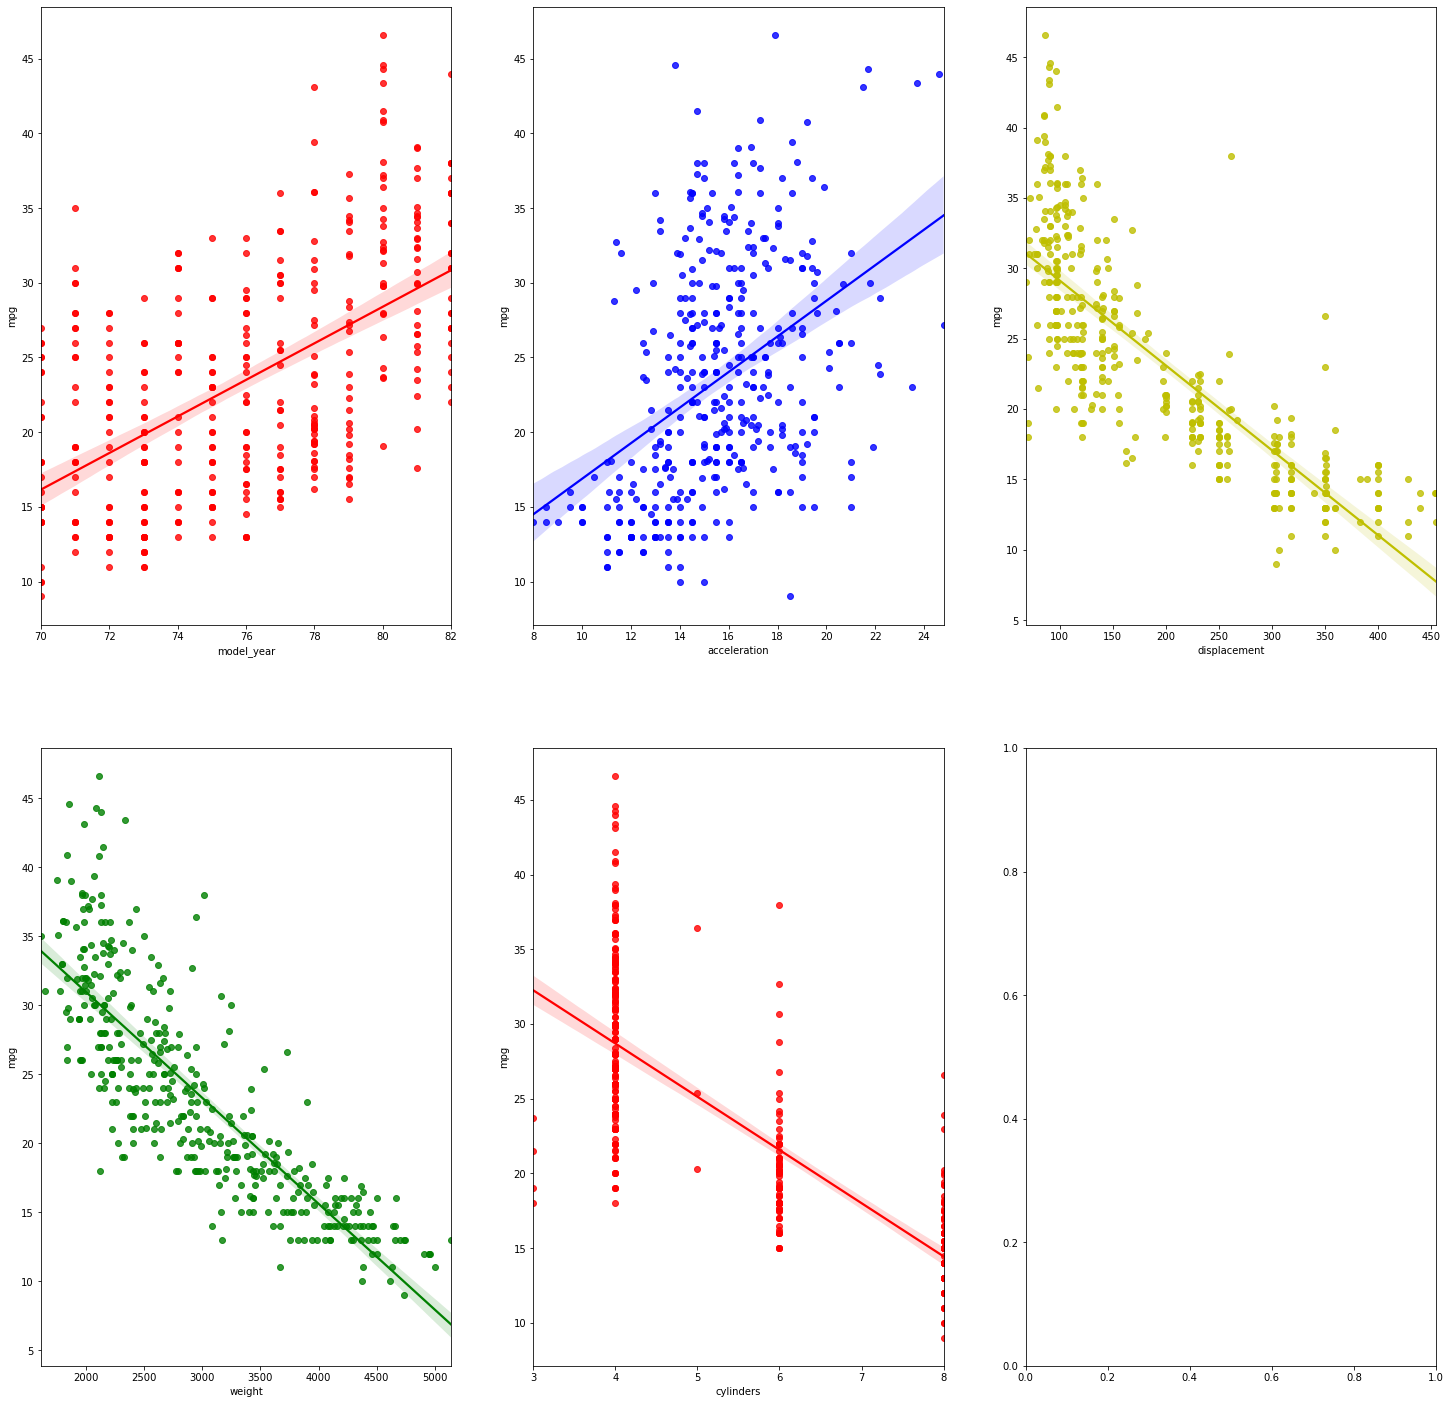

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(25,25))
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, features in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = features, y = 'mpg', data = df, ax=axs[row][col], color=plot_color[i])